In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Define the file path
folder_path = "pot_test"
file_name = "adc_log_2025-04-23_15-23-40.csv"
file_path = os.path.join(folder_path, file_name)

# Check if the file exists
if not os.path.exists(file_path):
    raise FileNotFoundError(f"The file {file_path} does not exist.")

# Load the data
try:
    # Assuming the file is a CSV with a header
    data_df = pd.read_csv(file_path)
except Exception as e:
    raise ValueError(f"Error reading the file: {e}")

# Display the first few rows of the data
print("Data Preview:")
print(data_df.head())

Data Preview:
   timestamp_ms  ADC0  ADC1  ADC2
0            85  1388  1997  2052
1           172  1397  1979  2042
2           186  1393  1995  2058
3           198  1387  1990  2058
4           199  1388  1994  2061


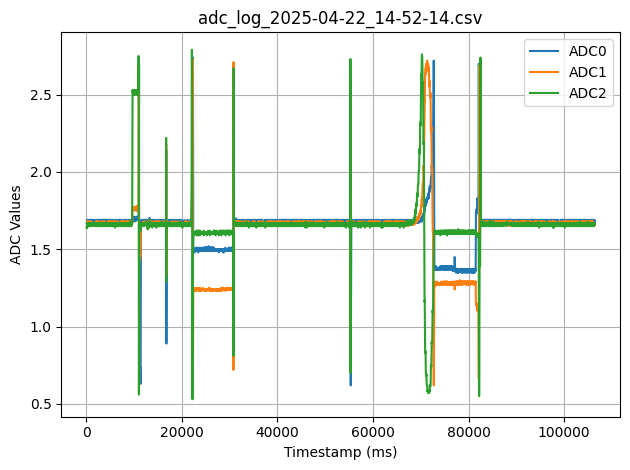

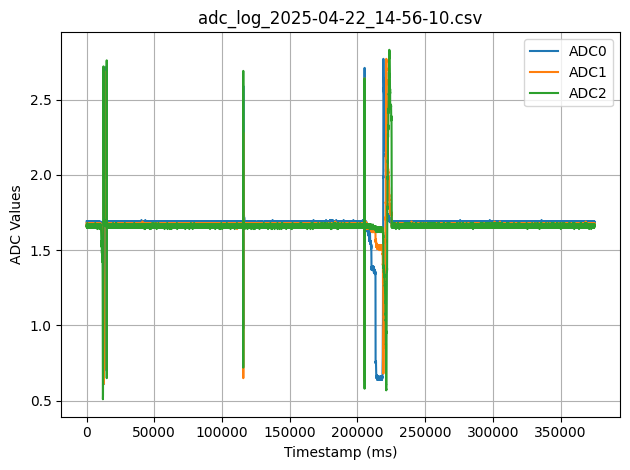

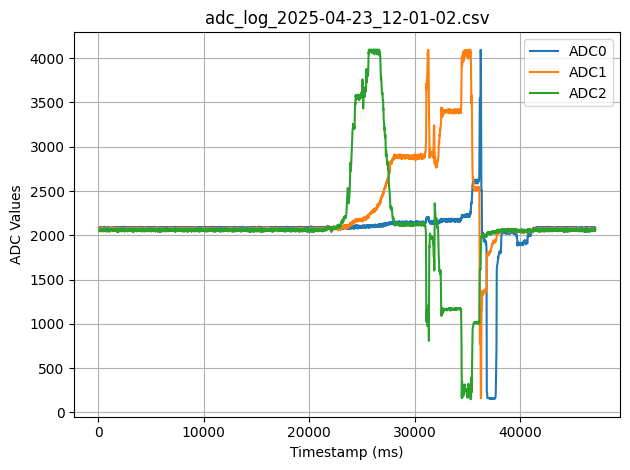

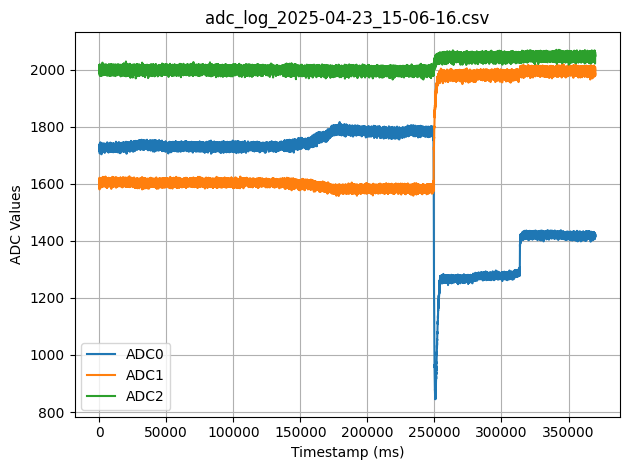

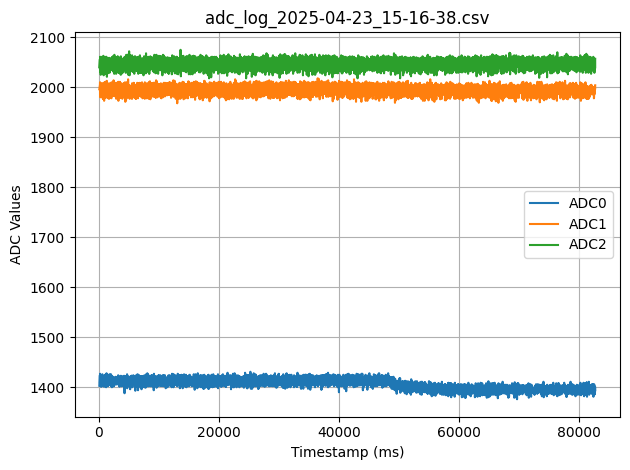

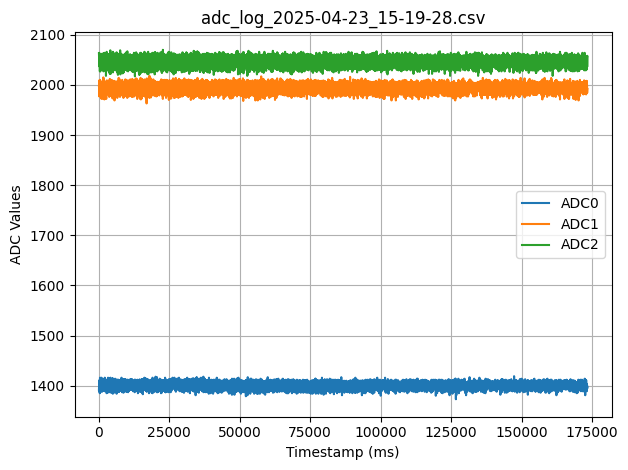

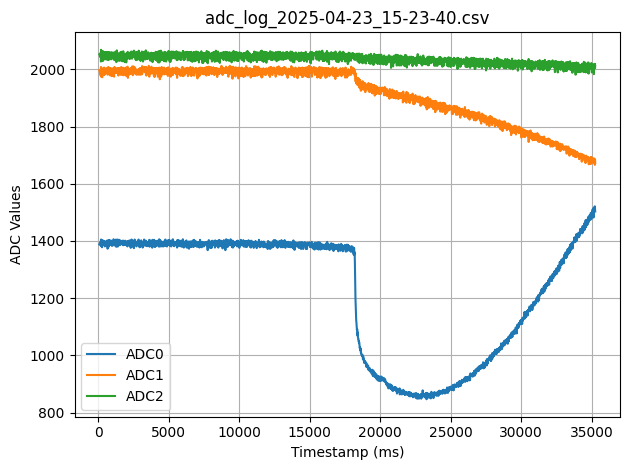

In [27]:
# Define the folder path
folder_path = "pot_test"

# List all CSV files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

if not csv_files:
    raise FileNotFoundError(f"No CSV files found in {folder_path}")

# Sort files based on datetime extracted from filename
# Assuming filename pattern is like "adc_log_2025-04-23_15-23-40.csv"
csv_files.sort(key=lambda name: pd.to_datetime(name.split('_')[2] + ' ' + name.split('_')[3].replace('.csv', '').replace('-', ':')))

# Loop through each CSV file, sorted
for file_name in csv_files:
    file_path = os.path.join(folder_path, file_name)

    try:
        # Load the data
        data_df = pd.read_csv(file_path)
    except Exception as e:
        print(f"Error reading {file_name}: {e}")
        continue  # Skip this file if there's an error

    # Check if the data has at least two columns
    if data_df.shape[1] < 2:
        print(f"Skipping {file_name}: not enough columns for visualization.")
        continue

    # Plot the data
    # plt.figure(figsize=(8, 5), dpi=300)
    for column in data_df.columns[1:]:  # Skip the first column (timestamp_ms)
        plt.plot(data_df[data_df.columns[0]], data_df[column], label=column)

    plt.title(file_name)
    plt.xlabel("Timestamp (ms)")
    plt.ylabel("ADC Values")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

In [14]:
# Assuming your DataFrame is called df
# Filter rows where timestamp_ms >= 15000
filtered_df = data_df[data_df['timestamp_ms'] >= 15000].copy()

# Convert timestamp_ms to seconds
filtered_df['timestamp_s'] = filtered_df['timestamp_ms'] / 1000

# Drop the original timestamp_ms
filtered_df = filtered_df.drop(columns=['timestamp_ms'])

# Reorder columns to put timestamp_s first
cols = ['timestamp_s'] + [col for col in filtered_df.columns if col != 'timestamp_s']
filtered_df = filtered_df[cols]


print(filtered_df.head())

      timestamp_s  ADC0  ADC1  ADC2
1135       15.009  1389  1987  2053
1136       15.023  1379  1992  2040
1137       15.035  1392  2004  2024
1138       15.048  1392  1992  2057
1139       15.062  1385  2004  2061


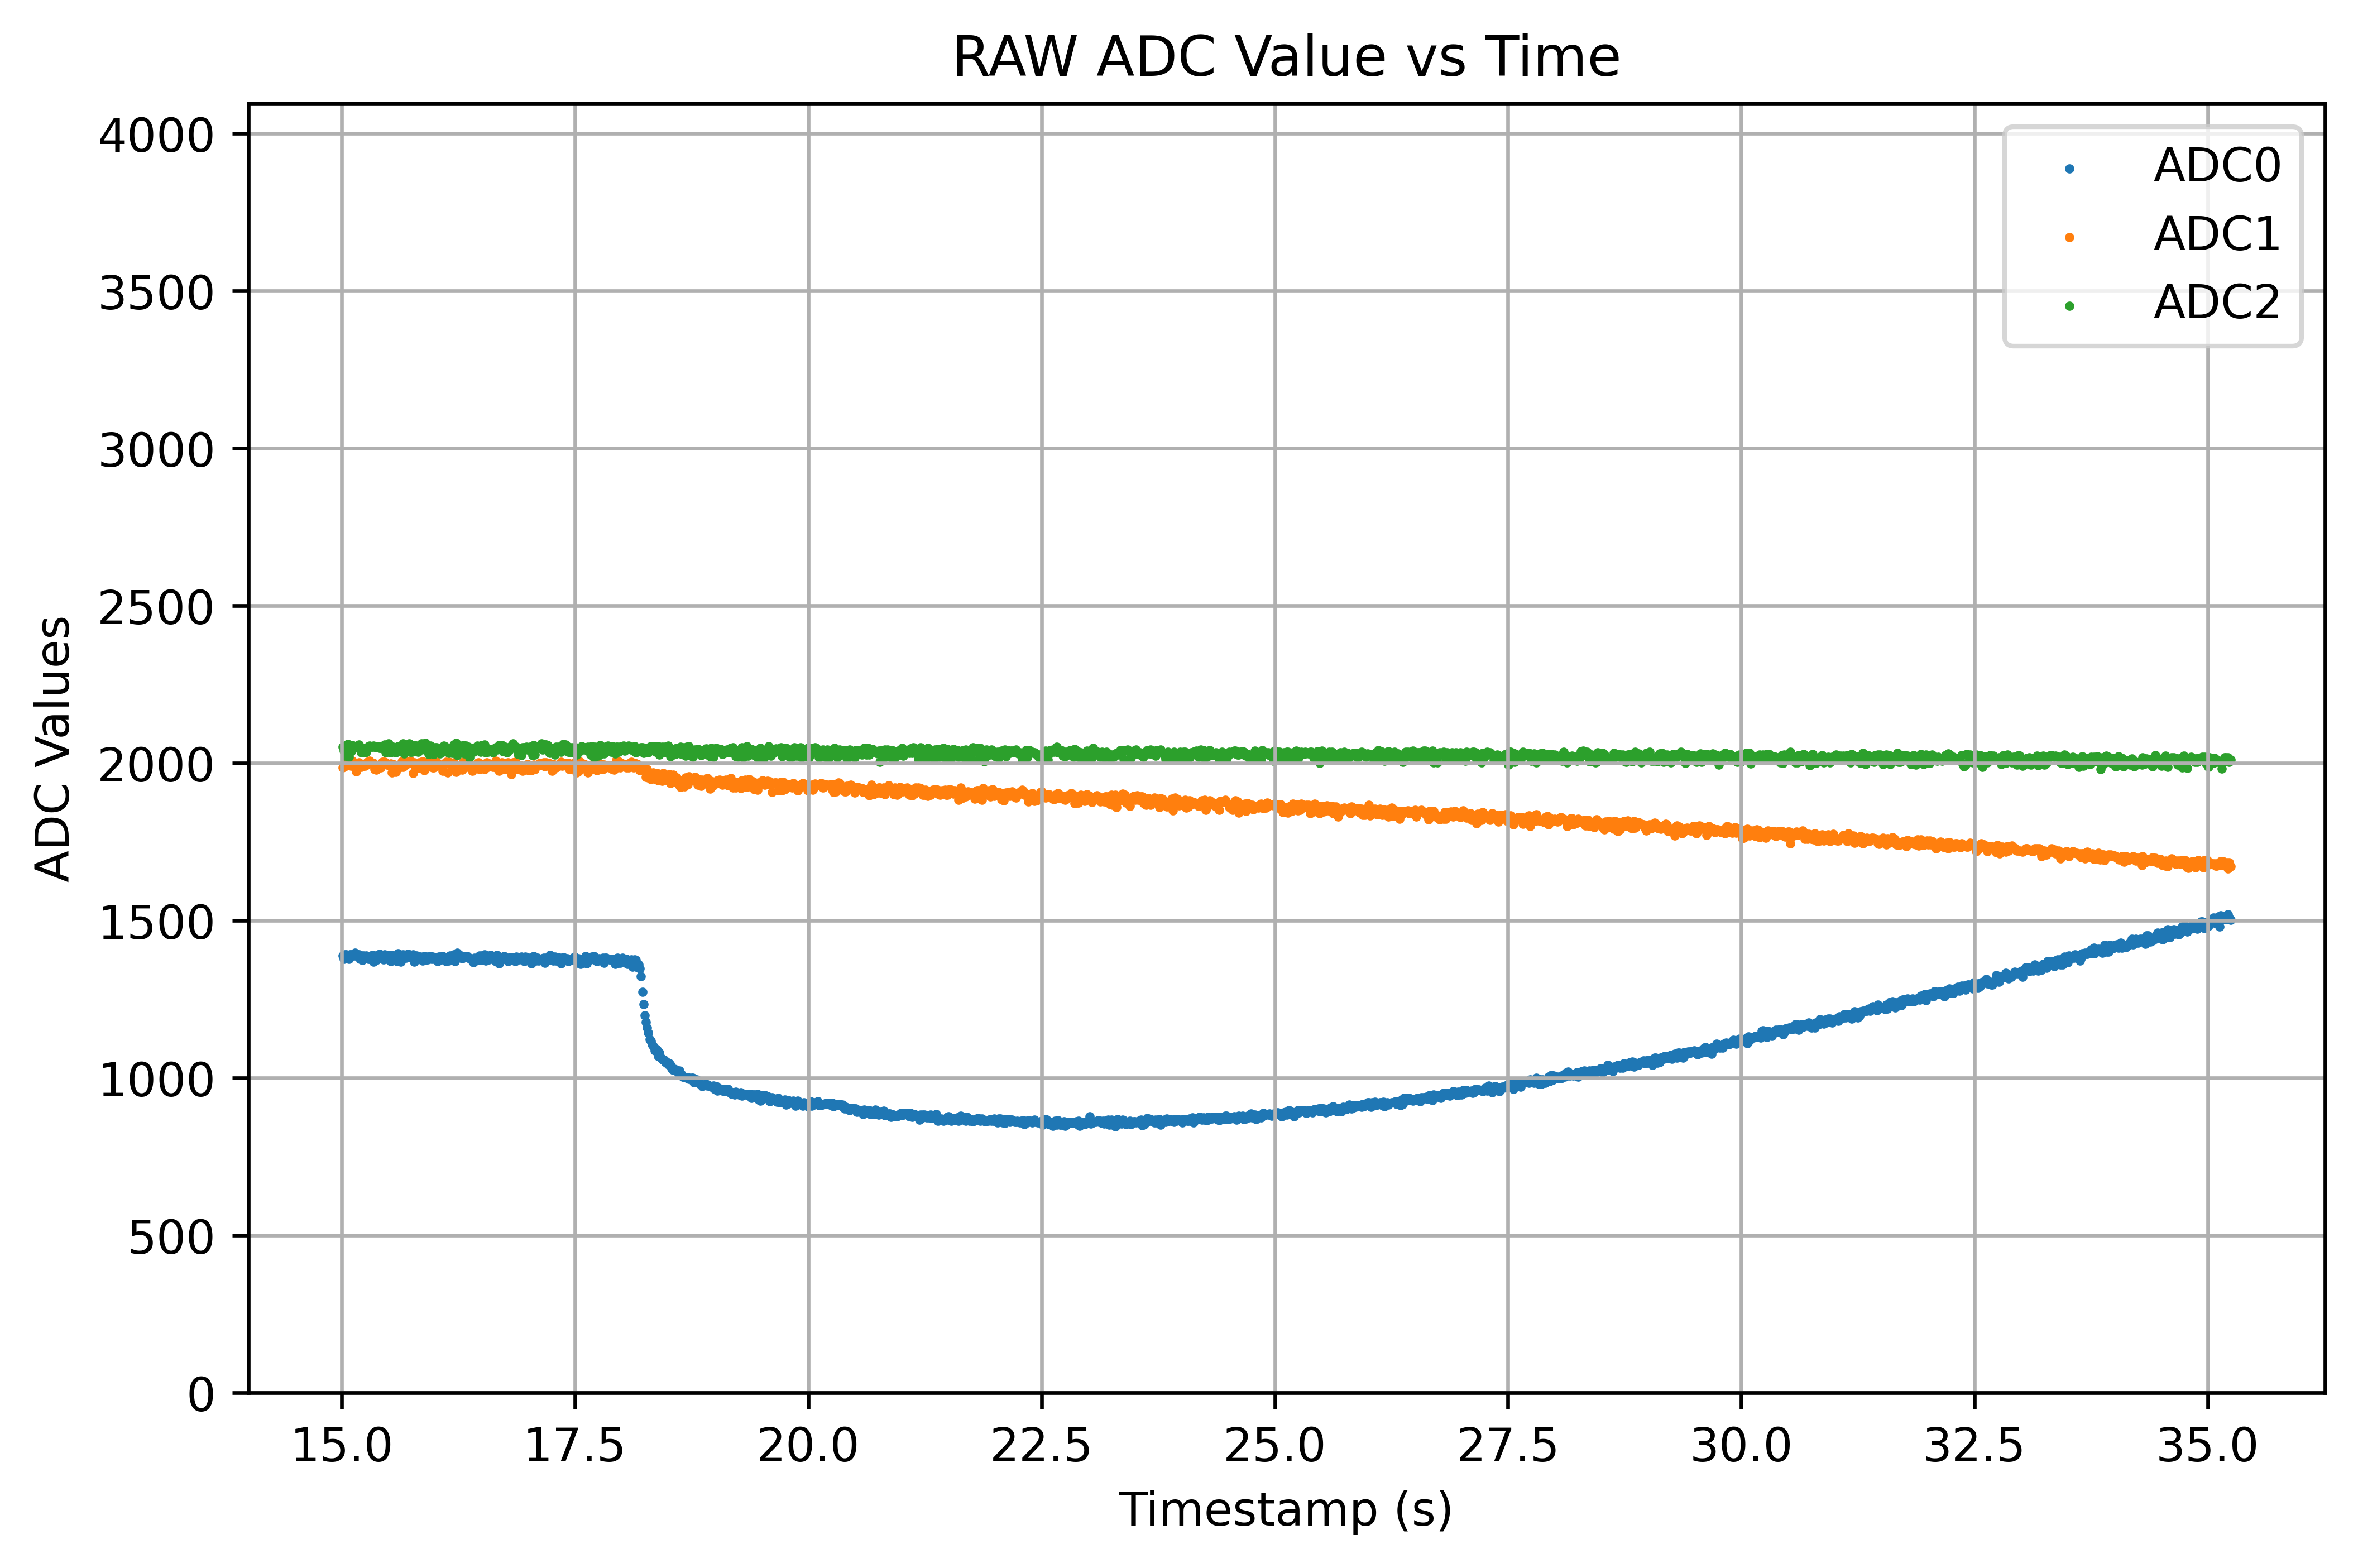

In [50]:
# Plot the data
plt.figure(figsize=(8, 5), dpi=600)  # Set the figure size and DPI
for column in filtered_df.columns[1:]:  # Skip the first column (e.g., timestamp or index)
    plt.scatter(filtered_df[filtered_df.columns[0]], filtered_df[column], label=column, s=1)

plt.title("RAW ADC Value vs Time")
plt.xlabel("Timestamp (s)")  # Use the first column as the x-axis label
plt.ylim(0, 4096)
plt.ylabel("ADC Values")
plt.legend()
plt.grid()
plt.show()

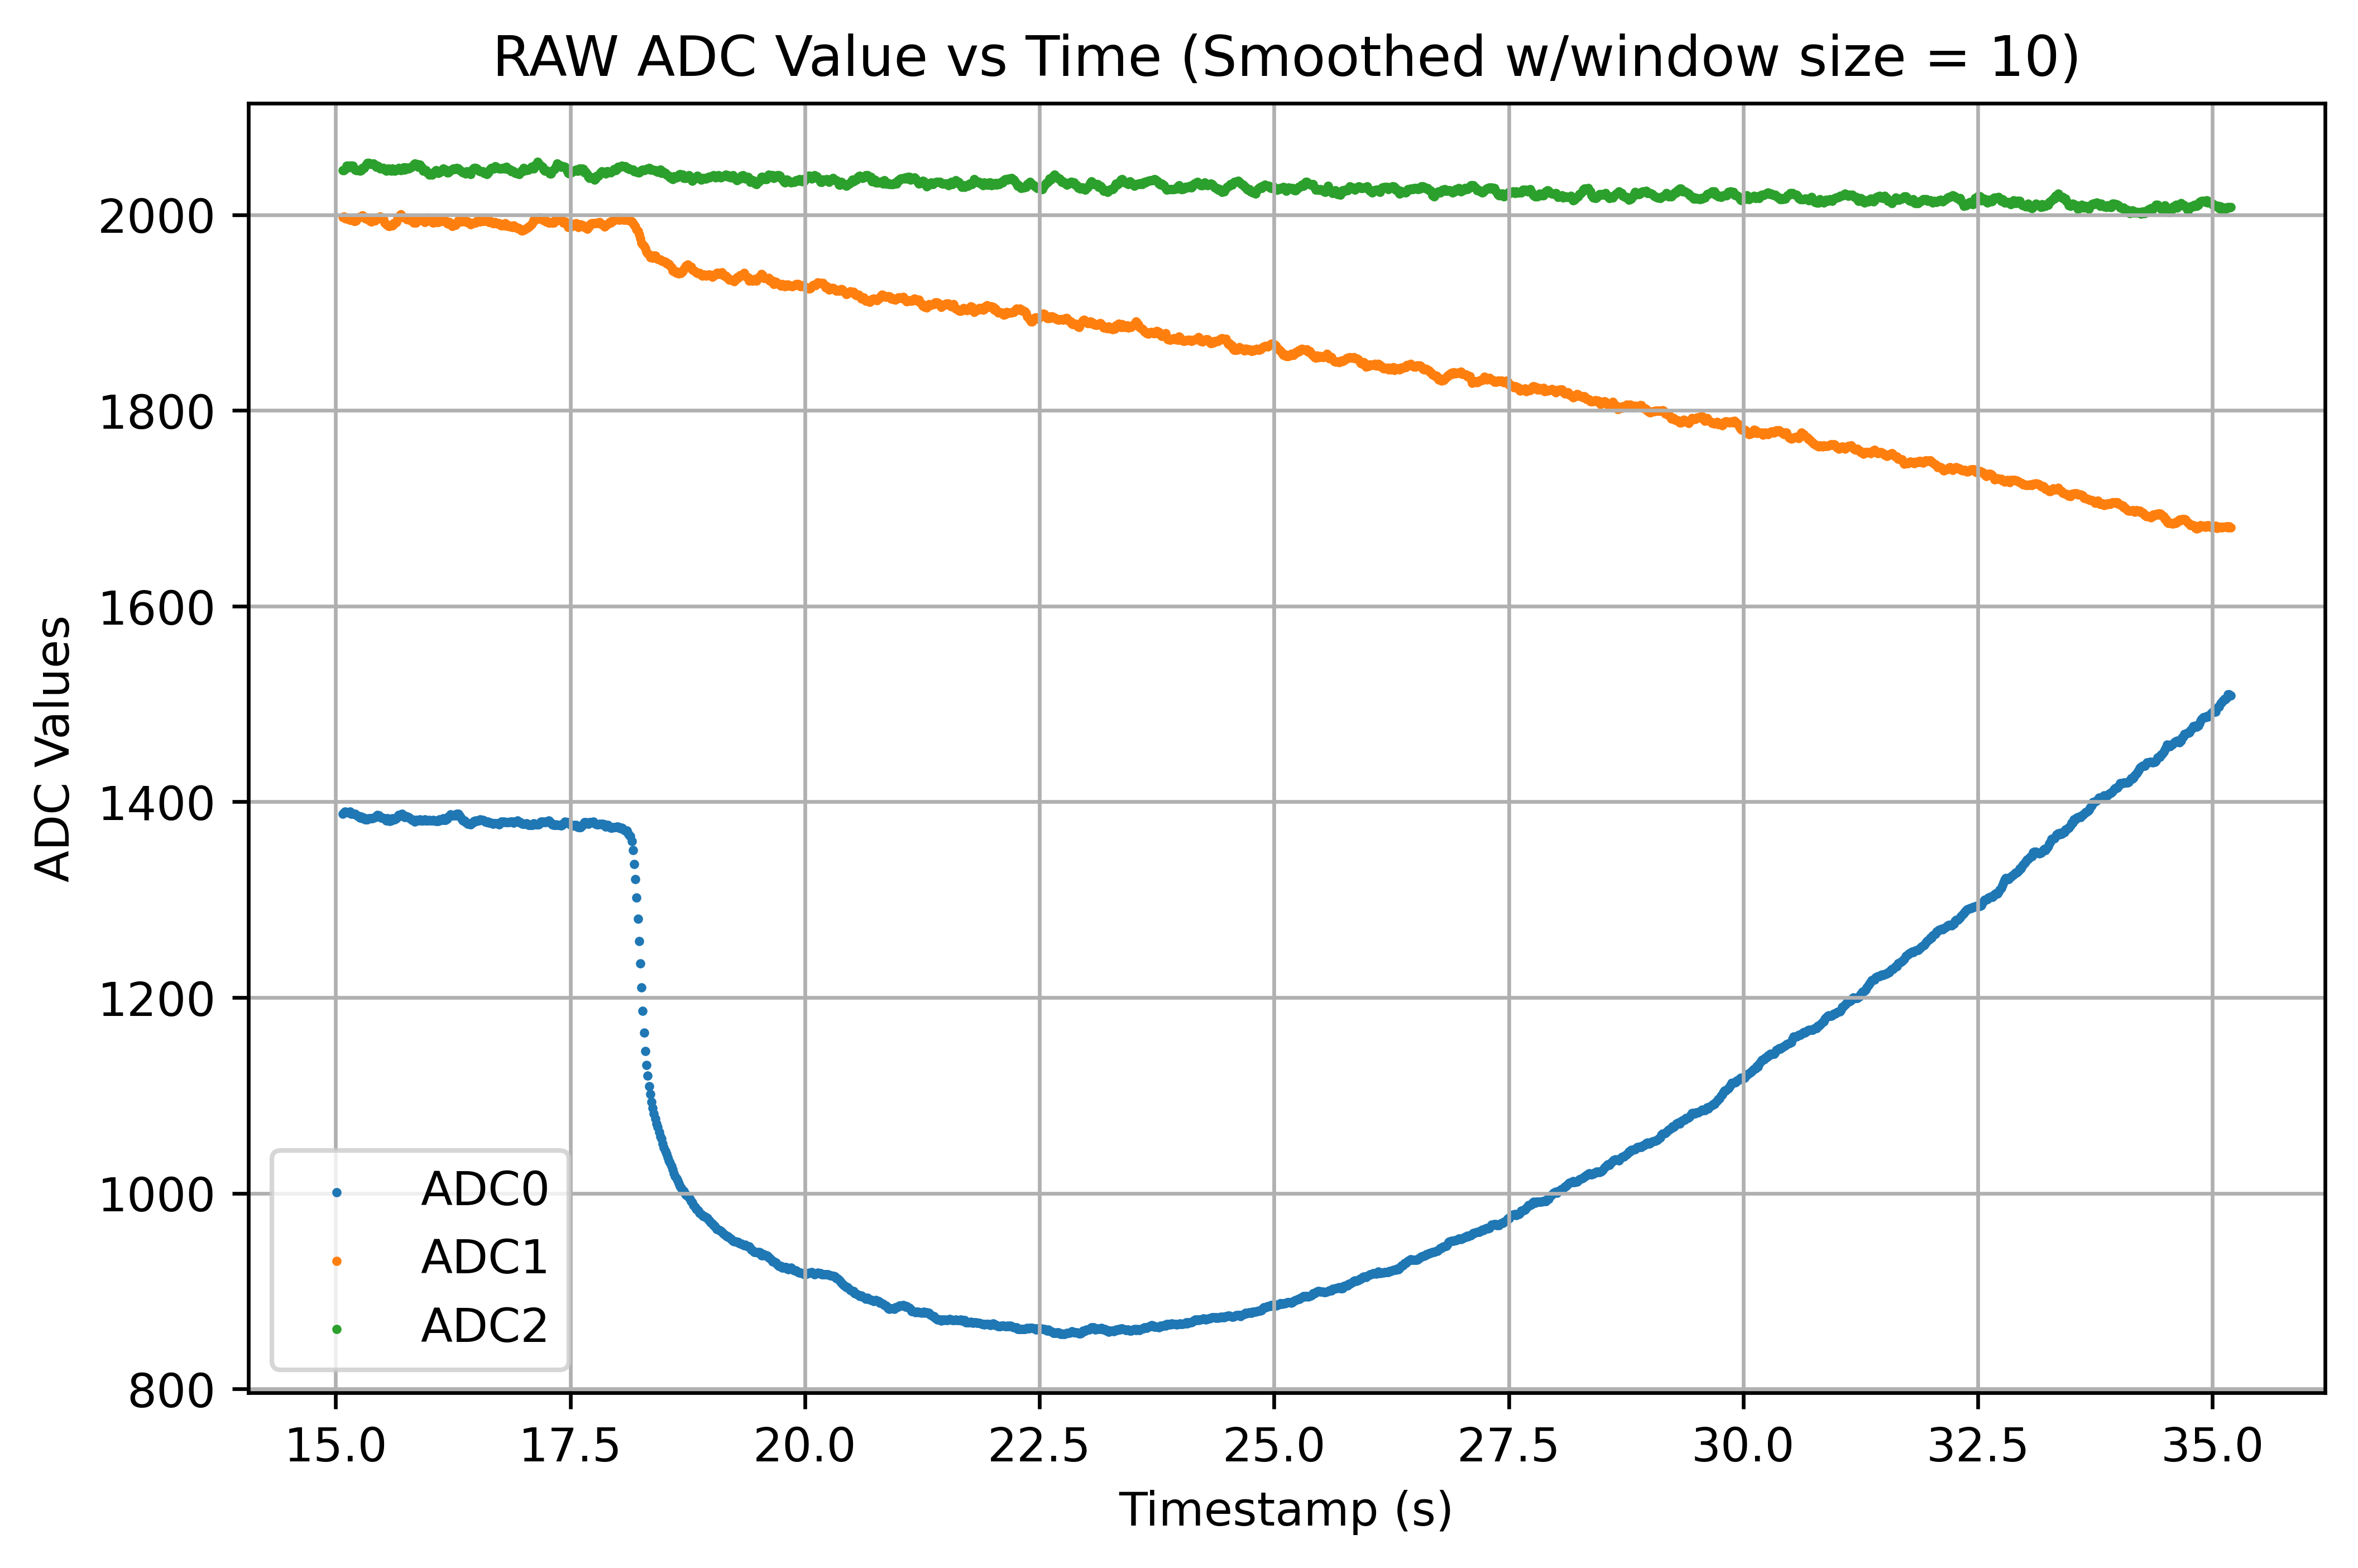

In [46]:
# Set window size for rolling average (adjust as needed)
window_size = 10

# Plot the data
plt.figure(figsize=(8, 5), dpi=600)
for column in filtered_df.columns[1:]:  # Skip the first column (timestamp_s)
    smoothed = filtered_df[column].rolling(window=window_size, center=True).mean()
    plt.scatter(filtered_df[filtered_df.columns[0]], smoothed, label=column, s=1)  # Use scatter for smoothed values

plt.title("RAW ADC Value vs Time (Smoothed w/window size = {})".format(window_size))
plt.xlabel("Timestamp (s)")
plt.ylabel("ADC Values")
plt.legend()
plt.grid()
plt.show()

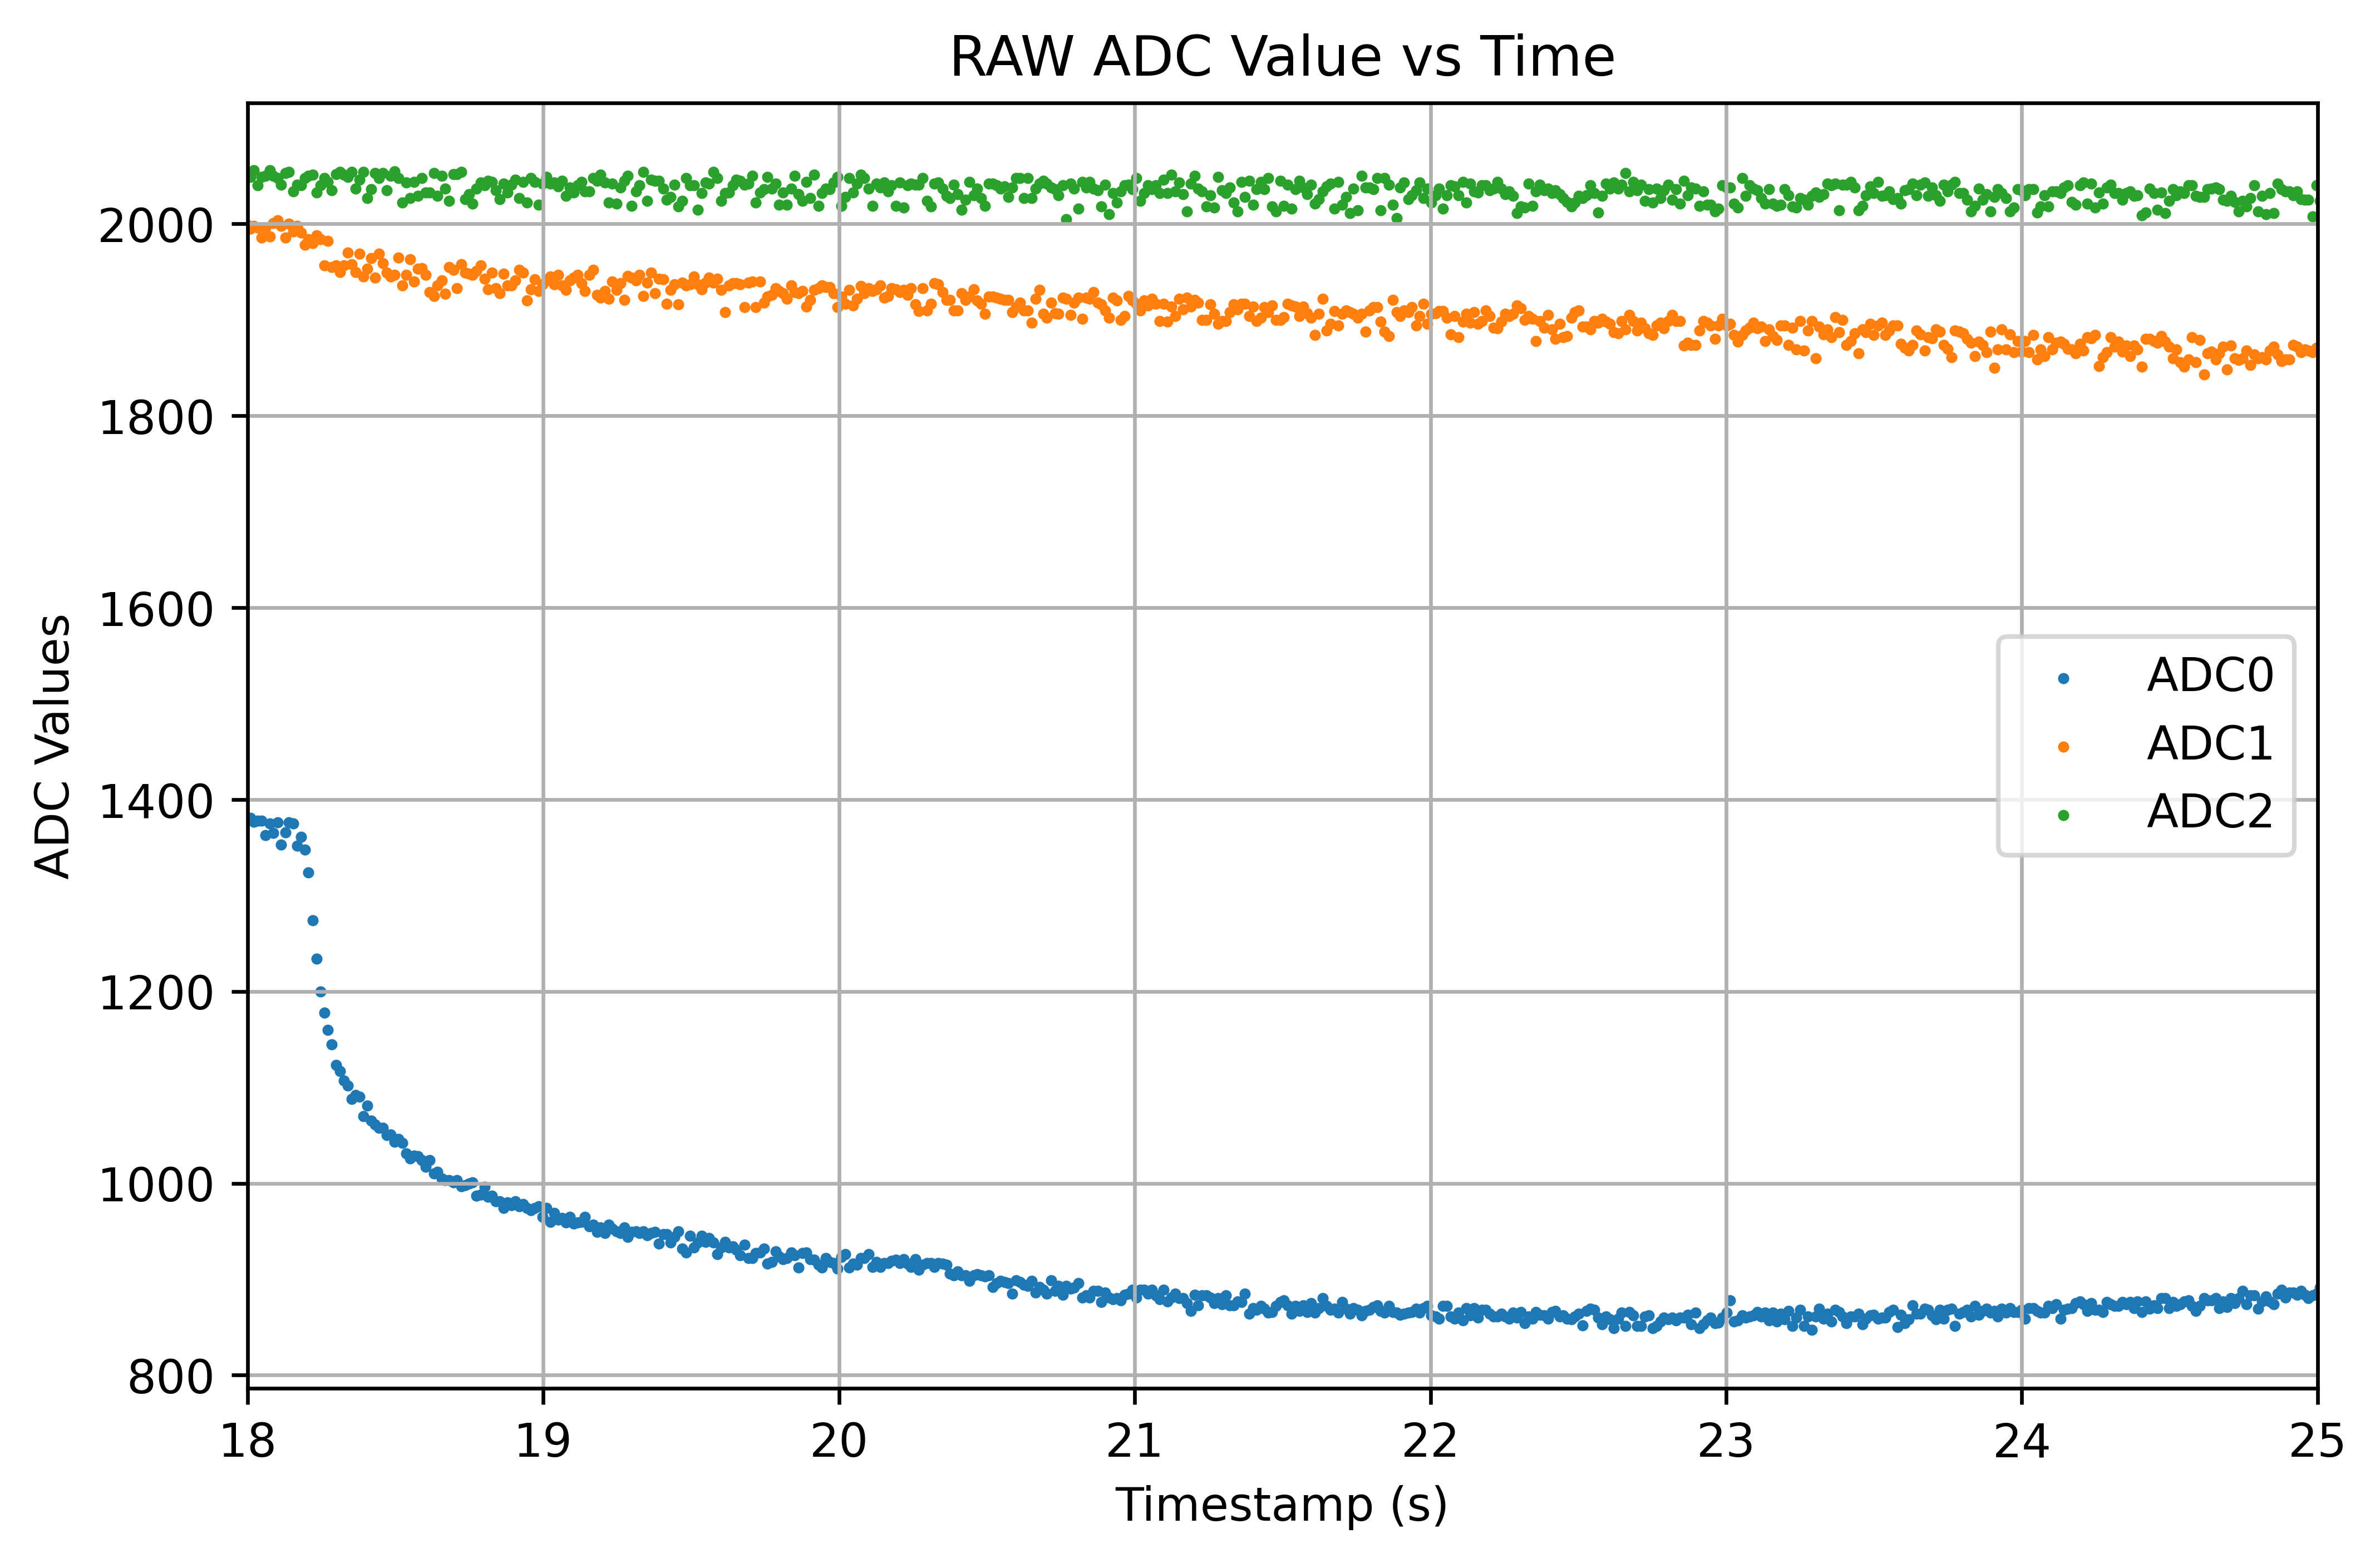

In [39]:
# Plot the data
plt.figure(figsize=(8, 5), dpi=600)  # Set the figure size and DPI
for column in filtered_df.columns[1:]:  # Skip the first column (e.g., timestamp or index)
    plt.scatter(filtered_df[filtered_df.columns[0]], filtered_df[column], label=column, s=2)

plt.title("RAW ADC Value vs Time")
plt.xlabel("Timestamp (s)")  # Use the first column as the x-axis label
plt.xlim(18, 25)  # Set x-axis limits
plt.ylabel("ADC Values")
plt.legend()
plt.grid()
plt.show()

Add approximate sensor & magnet location conversion

How many values to average together, and what averaging technique to best use?